## LOAN PREDICTION

### Introduction:

In the rapidly evolving landscape of financial services, automating the loan eligibility process is a critical step towards efficiency and customer satisfaction. The company aims to streamline this process by leveraging customer data collected during online application submissions. The data encompasses various factors such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, and Credit History, among others.

The primary goal is to develop a robust and accurate model that can automatically assess the eligibility of a customer for a loan in real-time. By doing so, the company not only enhances operational efficiency but also ensures a targeted approach in reaching out to potential customers who are eligible for loan approval.
### Problem Description
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.
### Goals
The core objective is to create a system that can efficiently process customer information and determine loan eligibility without manual intervention. This reduces processing time and enhances the overall customer experience.

By accurately identifying eligible customer segments, the company can tailor its marketing and outreach efforts. This targeted approach not only increases the chances of loan approval but also improves customer satisfaction.

Implementing a data-driven eligibility model allows the company to assess risk more accurately. By considering factors such as Credit History, the model can provide insights into potential risks associated with each application.



### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

### Load  data

In [2]:
# Load the training data
train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Data Understanding

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
train.shape

(614, 13)

In [6]:
len(train)

614

#### Inspecting columns

In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

3+ is an invalid value entered which is making this int column as object which needs to be corrected and converted into numeric data type

In [10]:
train['Dependents'].replace('3+',3,inplace=True)#Replacing 3+ to 4

train['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:

# Fill NaN values with 0
train['Dependents'].fillna(0, inplace=True)

# Replace '3+' with '4'
train['Dependents'].replace('3+', '4', inplace=True)

# Convert the 'Dependents' column to int64
train['Dependents'] = train['Dependents'].astype('int64')

# You can verify the data type of the column using:
print(train['Dependents'].dtype)

int64


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


### Data Cleaning

#### Checking Duplicates

In [14]:
# A function to check for duplicates in our datasets
def check_duplicates(df):
    
    duplicates = df[df.duplicated()]
    if duplicates.shape[0] == 0:
        print("No duplicates found in the dataset")
    else:
        print("Duplicates found in the dataset:")
        return duplicates
# Calling for the function to check for duplicates
check_duplicates(train)

No duplicates found in the dataset


#### Checking Missing Values

In [15]:
# A function to check for missing values in our dataset
def check_missing_values(data):
    # Count missing values in each column
    missing_values = data.isnull().sum()

    # Convert missing values count to percentage of total rows
    missing_percent = (missing_values / len(data)) * 100

    # Combine the missing values count and percent into a DataFrame
    missing_df = pd.concat([missing_values, missing_percent], axis=1)
    missing_df.columns = ['Missing Values', '% of Total']
# Return only columns with missing values
    missing_df = missing_df[missing_df['Missing Values'] > 0]

    return missing_df

# Check missing values in each dataset
display(check_missing_values(train))

,Missing Values,% of Total
Gender,13,2.117264
Married,3,0.488599
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Loan_Amount_Term,14,2.280130
Credit_History,50,8.143322


#### Handling Missing Values

In [16]:
# Imputing the missing values in categorical column:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)

In [17]:
# Replace missing values in numerical variables with the mean
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean(), inplace=True)

In [18]:
# Check missing values in each dataset
display(check_missing_values(train))

,Missing Values,% of Total


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [20]:
train.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,1.009623,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


#### Checking for Outliers

<Figure size 1000x400 with 0 Axes>

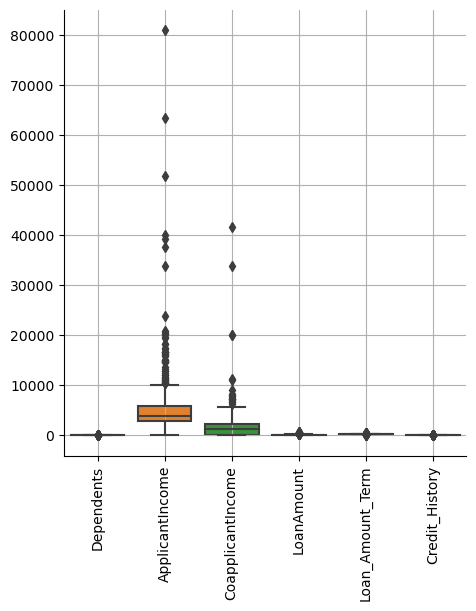

In [21]:
plt.figure(figsize=(10,4))
sns.catplot(data=train,kind='box')
plt.xticks(rotation=90)
plt.grid()
plt.show()

There seems to be high positive skewness in Dependents, Applicant Income,Co applicant income, loan amount wherein there might be chances of outliers which needs to be checked

Loan amount term and credit history has negative skewness

There seems to be outliers in applicant income and coapplicant income which needs to be taken into consideration

### Feature Engineering

In [22]:
class FeatureEngineer:
    def __init__(self, data):
        self.data = data

    def create_family_size_feature(self):
        self.data['FamilySize'] = self.data['Dependents'].apply(lambda x: int(x[0]) if isinstance(x, str) else 0) + 1

    def create_total_income_feature(self):
        self.data['TotalIncome'] = self.data['ApplicantIncome'] + self.data['CoapplicantIncome']

    def create_loan_to_income_ratio_feature(self):
        self.data['LoanToIncomeRatio'] = self.data['LoanAmount'] / self.data['TotalIncome']

    def categorize_loan_term(self):
        def term_category(term):
            if term <= 180:
                return 'Short-Term'
            elif term <= 360:
                return 'Medium-Term'
            else:
                return 'Long-Term'

        self.data['LoanTermCategory'] = self.data['Loan_Amount_Term'].apply(term_category)

    def create_has_credit_history_feature(self):
        self.data['HasCreditHistory'] = self.data['Credit_History'].apply(lambda x: 1 if x == 1 else 0)

    def one_hot_encode_categorical_features(self, columns):
        self.data = pd.get_dummies(self.data, columns=columns, drop_first=True)

    def perform_feature_engineering(self):
        self.create_family_size_feature()
        self.create_total_income_feature()
        self.create_loan_to_income_ratio_feature()
        self.categorize_loan_term()
        self.create_has_credit_history_feature()
        self.one_hot_encode_categorical_features(['Property_Area', 'Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status'])

if __name__ == '__main':
    # Load your dataset into a DataFrame
    train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

    # Create an instance of the FeatureEngineer class
    feature_engineer = FeatureEngineer(train)

    # Perform feature engineering
    feature_engineer.perform_feature_engineering()

    # Your 'train' DataFrame now contains the newly engineered features
    train.head()


In [23]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


### EDA

### Univariate Analysis of numerical columns

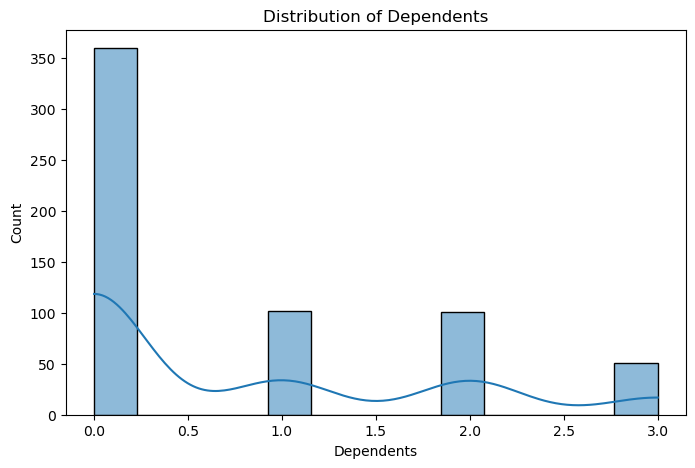

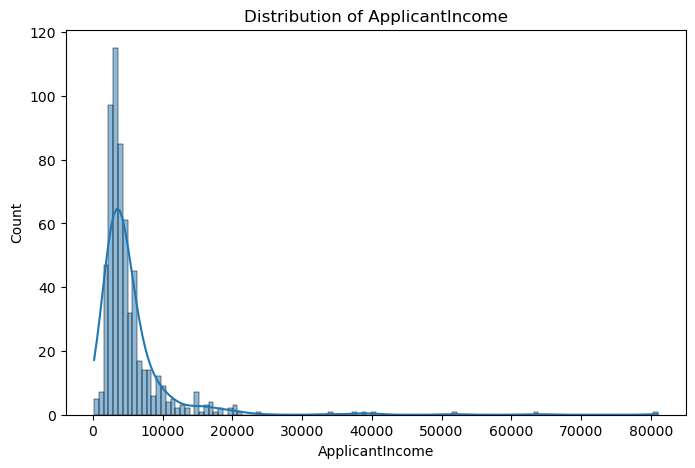

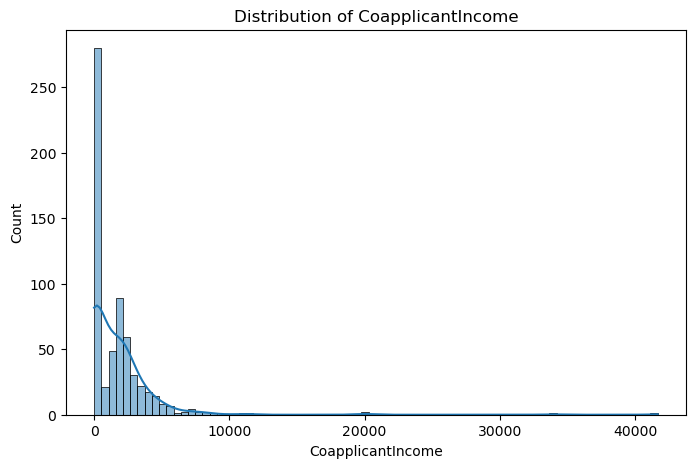

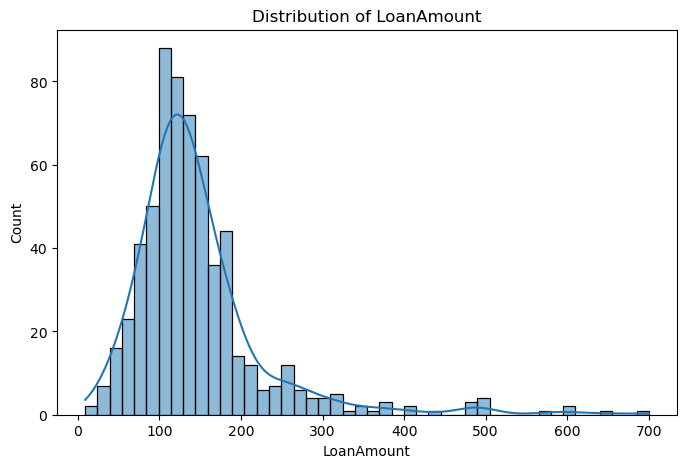

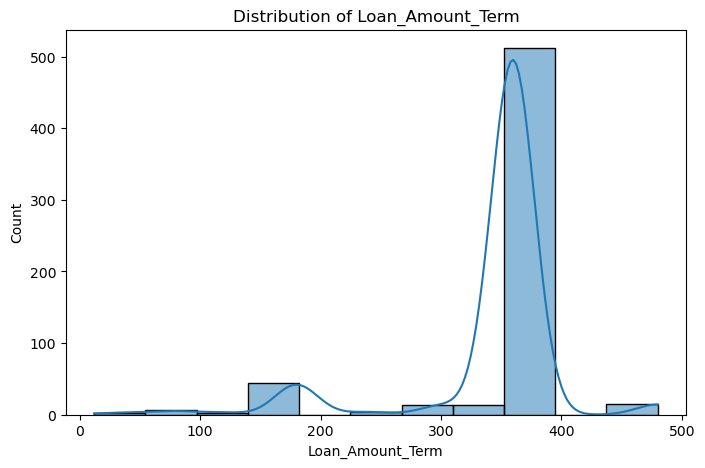

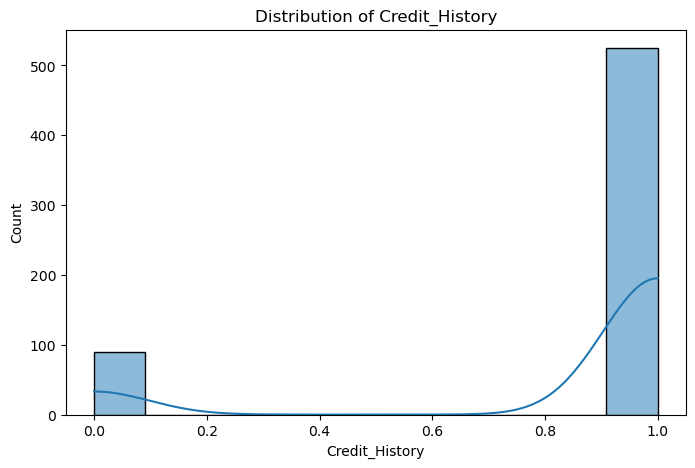

In [25]:
# Extract numerical columns
numerical_columns = ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Plot histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(train[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


### Univariate Analysis for Categorical Features

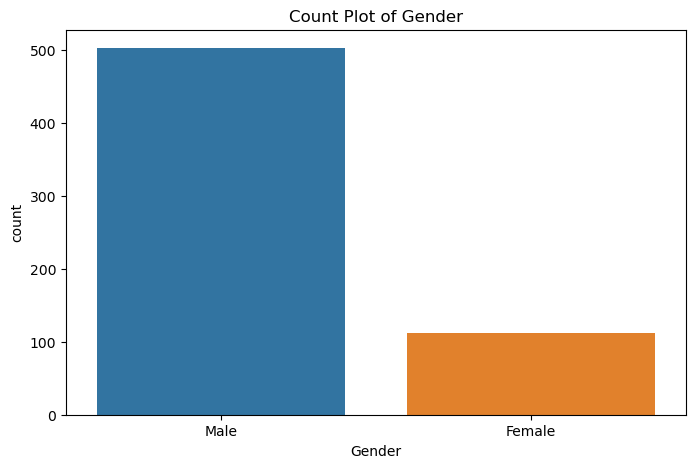

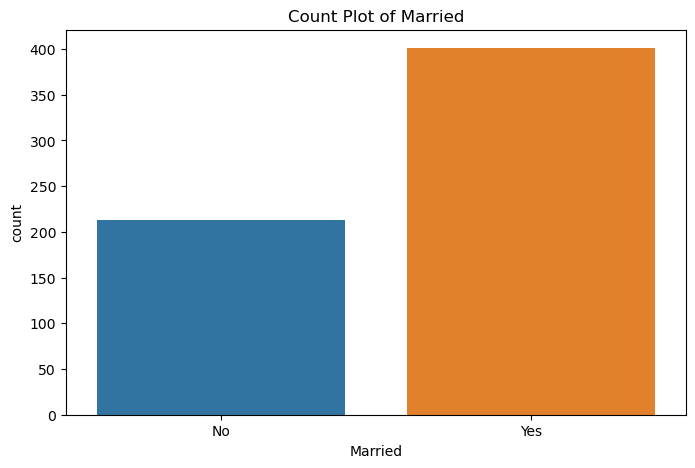

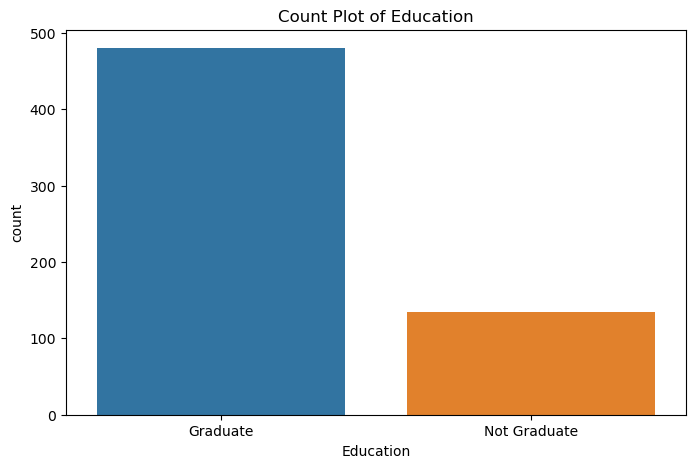

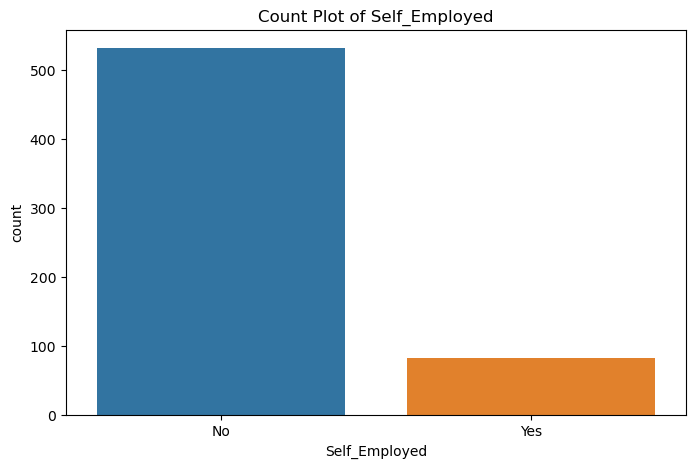

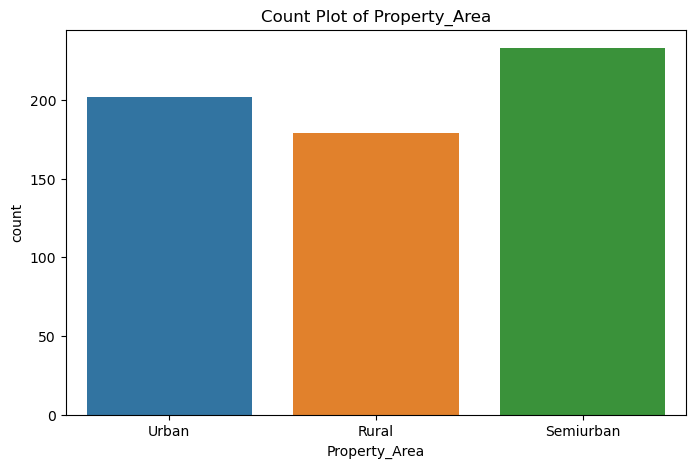

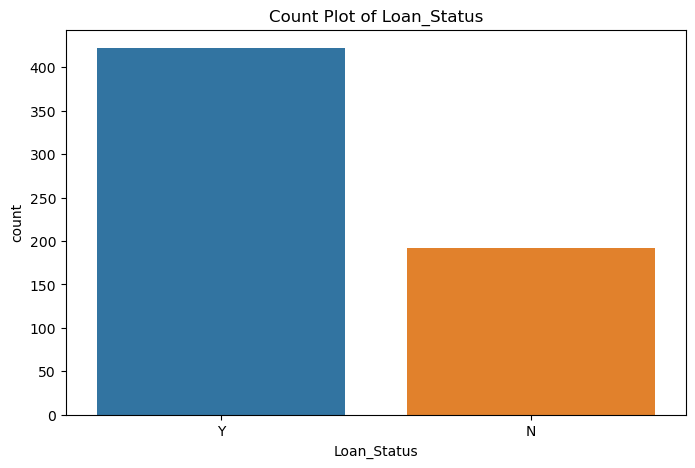

In [26]:
# Extract categorical columns
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Plot count plots for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(train[column])
    plt.title(f'Count Plot of {column}')
    plt.show()


### Bivarate Analysis

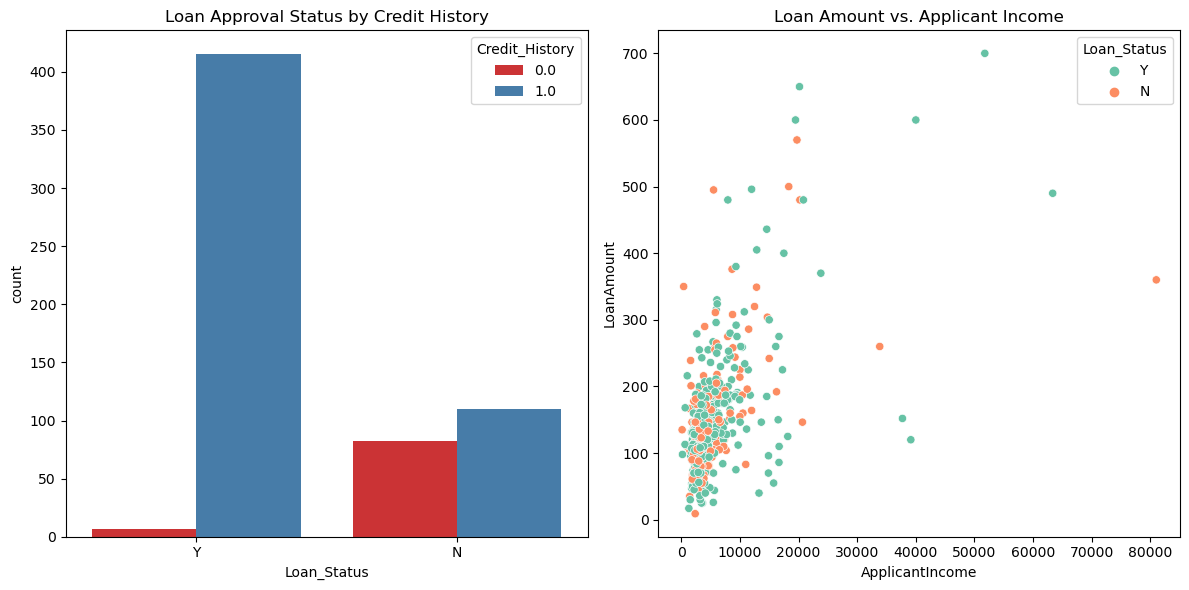

In [27]:
# Bivariate Analysis
plt.figure(figsize=(12, 6))

# Bivariate Analysis: Loan Status vs. Credit History
plt.subplot(1, 2, 1)
sns.countplot(data=train, x='Loan_Status', hue='Credit_History', palette='Set1')
plt.title('Loan Approval Status by Credit History')

# Bivariate Analysis: Loan Amount vs. Applicant Income
plt.subplot(1, 2, 2)
sns.scatterplot(data=train, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', palette='Set2')
plt.title('Loan Amount vs. Applicant Income')

plt.tight_layout()
plt.show()

### Loan Amount By Education

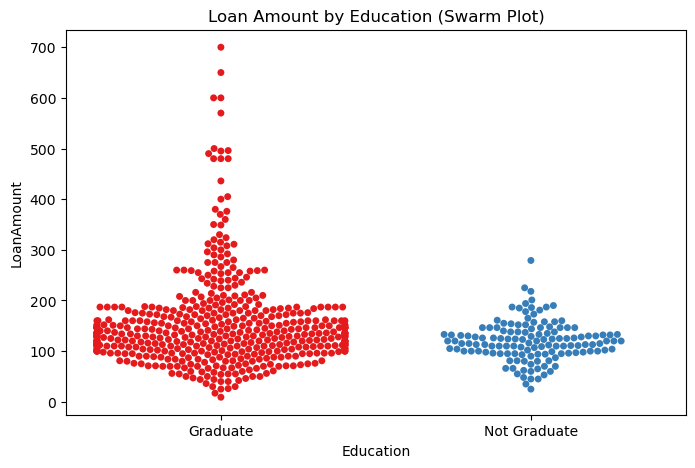

In [28]:
plt.figure(figsize=(8, 5))
sns.swarmplot(x='Education', y='LoanAmount', data=train, palette='Set1', size=5)
plt.title('Loan Amount by Education (Swarm Plot)')
plt.show()


### Violin Plot of Loan Amount by Education and Gender

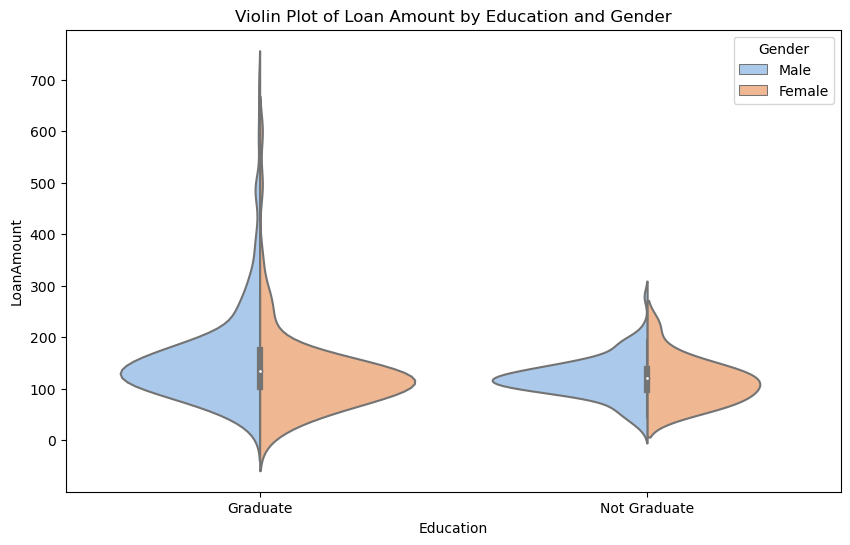

In [29]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Education', y='LoanAmount', hue='Gender', data=train, split=True, palette='pastel')
plt.title('Violin Plot of Loan Amount by Education and Gender')
plt.show()


### Loan Status by Property Area

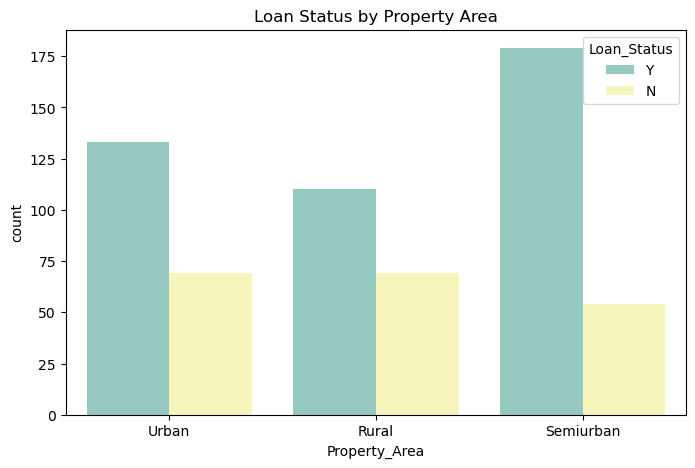

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train, x='Property_Area', hue='Loan_Status', palette='Set3')
plt.title('Loan Status by Property Area')
plt.show()


### Boxen Plot of Loan Amount by Credit History

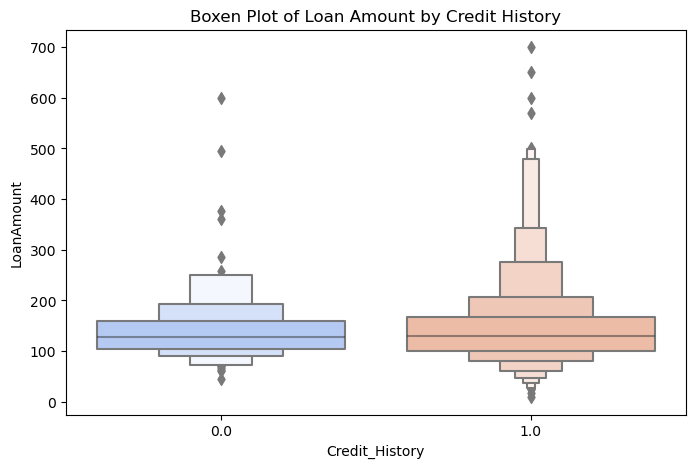

In [31]:
plt.figure(figsize=(8, 5))
sns.boxenplot(x='Credit_History', y='LoanAmount', data=train, palette='coolwarm')
plt.title('Boxen Plot of Loan Amount by Credit History')
plt.show()

### Pair Plot

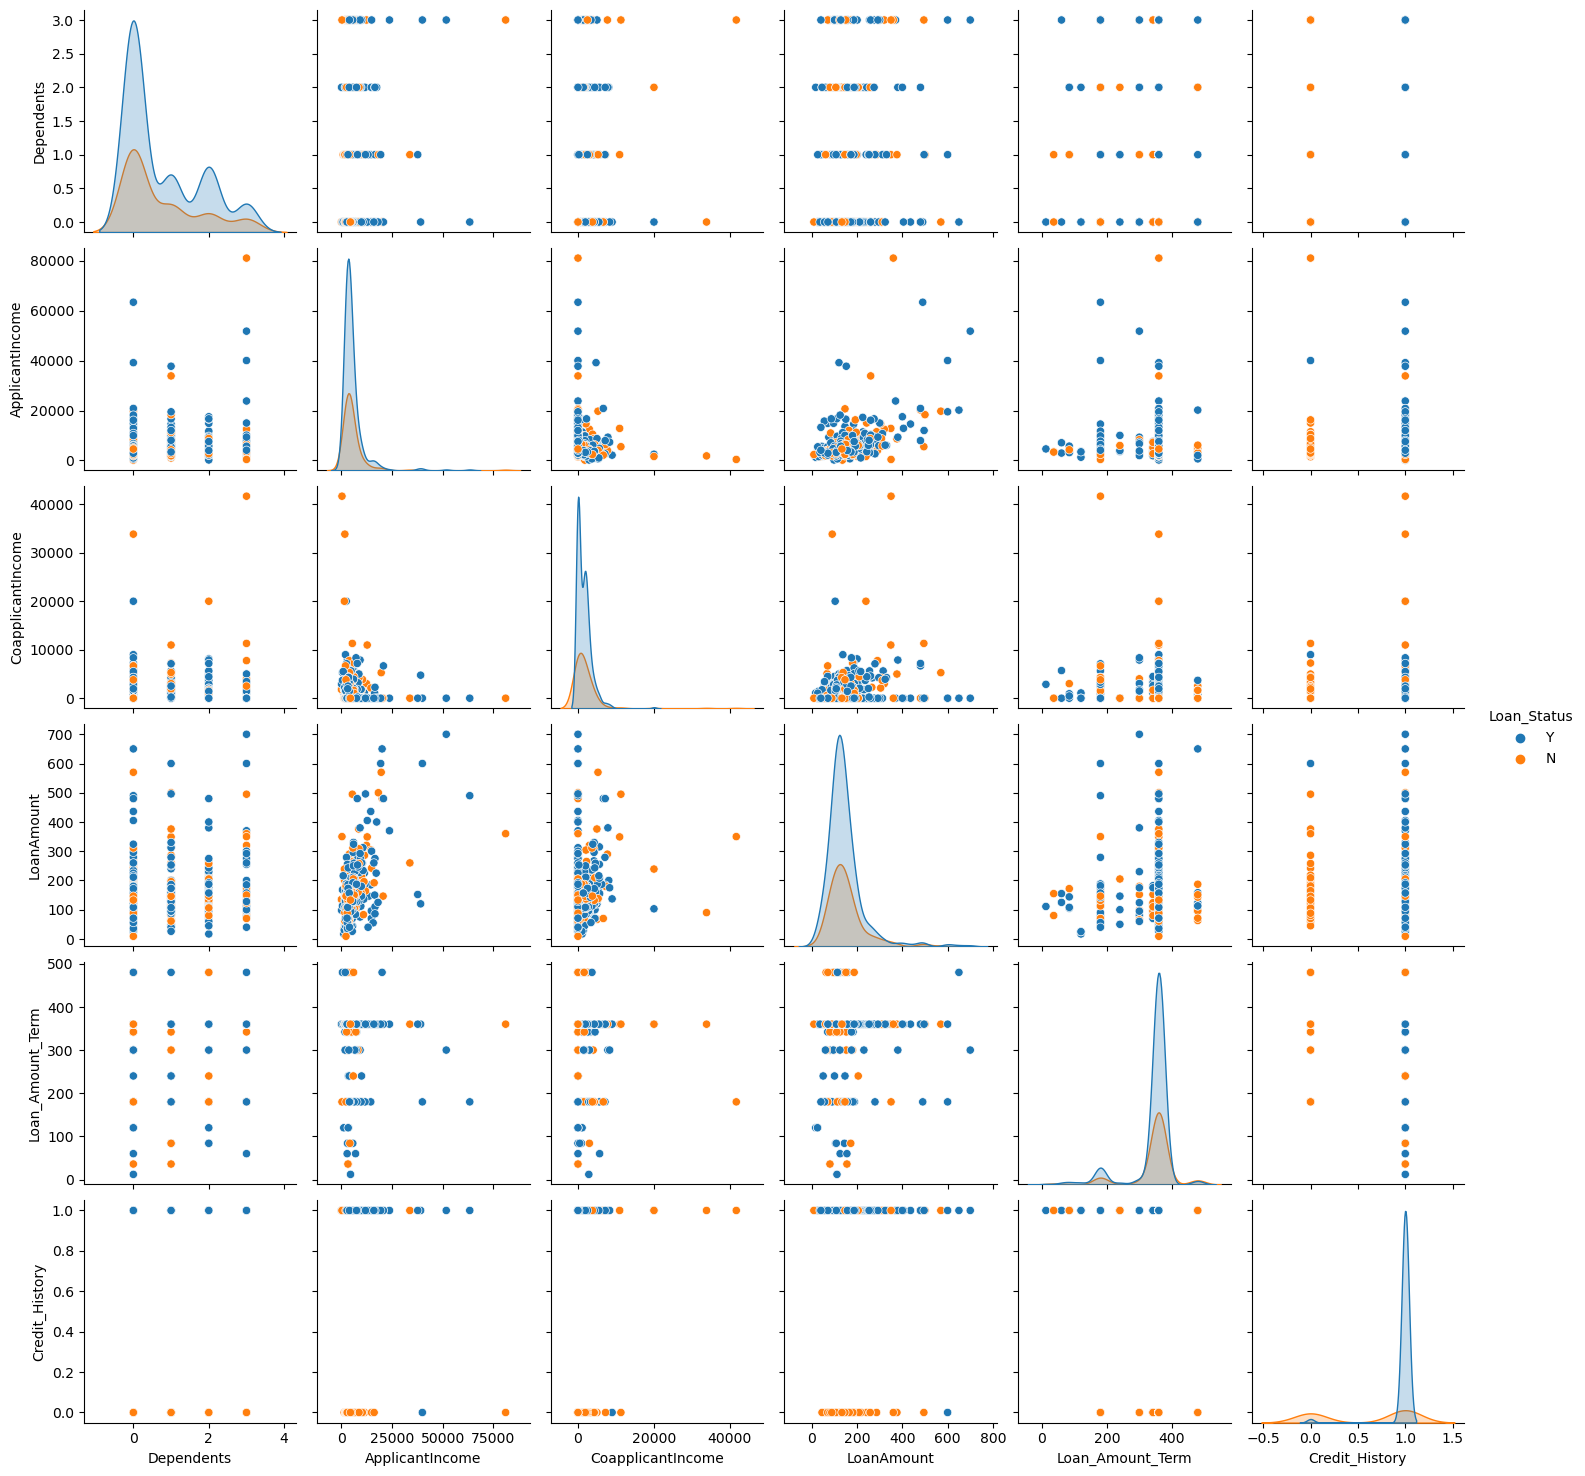

In [32]:
sns.pairplot(train,hue='Loan_Status')

### Correlation

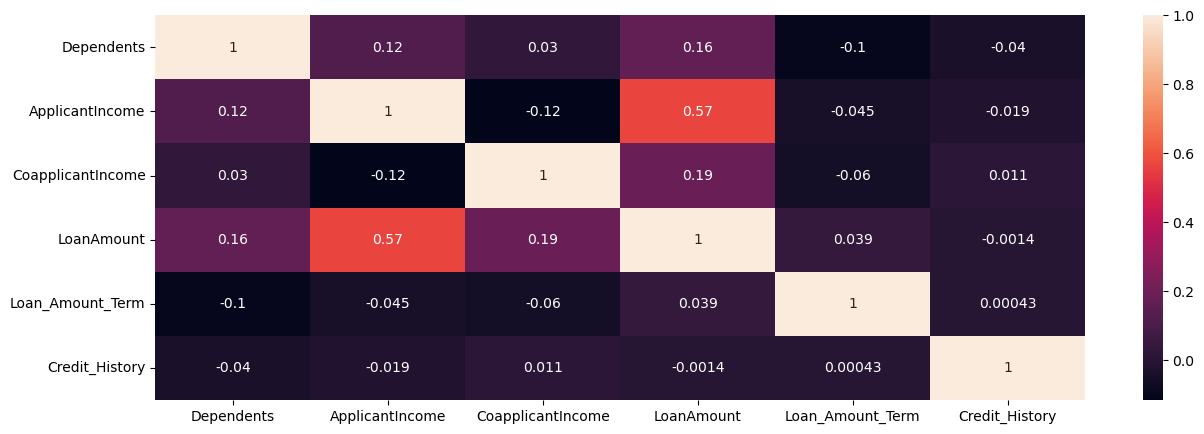

In [33]:
plt.figure(figsize=(15,5))
sns.heatmap(train.corr(),annot=True)
plt.show()

### Converting categorical columns into dummies

In [34]:
# Create dummy variables for all object (categorical) columns except 'Loan_Status'
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
train_dummies = pd.get_dummies(train, columns=categorical_columns)
train_dummies = train_dummies.drop('Loan_ID', axis=1)

# Display the first few rows of the 'train_dummies' DataFrame
train_dummies.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.412162,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
1,1,4583,1508.0,128.000000,360.0,1.0,N,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66.000000,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120.000000,360.0,1.0,Y,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141.000000,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1


In [35]:
# Convert 'Loan_Status' to a binary column (1 for 'Y', 0 for 'N')
train_dummies['Loan_Status'] = train_dummies['Loan_Status'].map({'Y': 1, 'N': 0})

# Display the first few rows of the updated DataFrame
train_dummies.head()


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.412162,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1
1,1,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66.000000,360.0,1.0,1,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120.000000,360.0,1.0,1,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141.000000,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1


### Training Data

In [36]:
# Creating X (input variables) and Y (Target Variable) from the new_train data.
x = train_dummies.drop('Loan_Status', axis='columns')
y = train_dummies['Loan_Status']

In [37]:
# Using train test split on the training data for validation
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=3)

In [38]:
# Applying standard scaler

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train = ss.fit_transform(x)
x_test = ss.fit_transform(x)

### Modelling

#### Logistic Regression

In [39]:
#Building the model using LogisticRegression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [40]:
from sklearn.metrics import accuracy_score
# Getting the accuracy score for Logistic Regression
logreg_pred = logreg.predict(X_test)

logreg_score = accuracy_score(y_test, logreg_pred)  

print("Accuracy_Score =", format(logreg_score))

Accuracy_Score = 0.8540540540540541


In [41]:
from sklearn.metrics import confusion_matrix, classification_report

# Classification report and confusion matrix of the SVM
print(confusion_matrix(y_test,logreg_pred ))
print(classification_report(y_test,logreg_pred))

[[ 22  23]
 [  4 136]]
              precision    recall  f1-score   support

           0       0.85      0.49      0.62        45
           1       0.86      0.97      0.91       140

    accuracy                           0.85       185
   macro avg       0.85      0.73      0.76       185
weighted avg       0.85      0.85      0.84       185



 #### RandomForest

In [42]:
#Building the model using RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

# Getting the accuracy score for Random Forest
rfc_pred = rfc.predict(X_test)
rfr_score = metrics.accuracy_score(y_test, rfc_pred)
print("Accuracy_Score =", format(rfr_score))

Accuracy_Score = 0.827027027027027


In [43]:
from sklearn.metrics import confusion_matrix, classification_report
# Classification report and confusion matrix of the Random Forest model
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test,rfc_pred))

[[ 25  20]
 [ 12 128]]
              precision    recall  f1-score   support

           0       0.68      0.56      0.61        45
           1       0.86      0.91      0.89       140

    accuracy                           0.83       185
   macro avg       0.77      0.73      0.75       185
weighted avg       0.82      0.83      0.82       185



#### SVM

In [44]:
from sklearn import svm
# Create an SVM classifier
svm = svm.SVC(kernel='linear')

# Train the classifier
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [45]:
# Getting the accuracy score for SVM
svm_pred = svm.predict(X_test)

svm_score = metrics.accuracy_score(y_test, svm_pred)
print("Accuracy_Score =", format(svm_score))

Accuracy_Score = 0.8


In [46]:
# Classification report and confusion matrix of the SVM
print(confusion_matrix(y_test,svm_pred ))
print(classification_report(y_test,svm_pred))

[[ 13  32]
 [  5 135]]
              precision    recall  f1-score   support

           0       0.72      0.29      0.41        45
           1       0.81      0.96      0.88       140

    accuracy                           0.80       185
   macro avg       0.77      0.63      0.65       185
weighted avg       0.79      0.80      0.77       185



#### Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Train the classifier on the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
# Get predictions on the test data
dt_pred = dt.predict(X_test)

# Calculate the accuracy score
dt_score = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy Score =", dt_score)

Decision Tree Accuracy Score = 0.7189189189189189


In [49]:
# Classification report for Decision Tree
dt_classification_report = classification_report(y_test, dt_pred)
print("Decision Tree Classification Report:")
print(dt_classification_report)

# Confusion matrix for Decision Tree
dt_confusion_matrix = confusion_matrix(y_test, dt_pred)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.60      0.51        45
           1       0.85      0.76      0.80       140

    accuracy                           0.72       185
   macro avg       0.65      0.68      0.66       185
weighted avg       0.75      0.72      0.73       185

Decision Tree Confusion Matrix:
[[ 27  18]
 [ 34 106]]


#### Guassian Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create a Gaussian Naive Bayes classifier
nb = GaussianNB()

# Train the classifier on the training data
nb.fit(X_train, y_train)

GaussianNB()

In [51]:
# Get predictions on the test data
nb_pred = nb.predict(X_test)

# Calculate the accuracy score
nb_score = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy Score =", nb_score)

Naive Bayes Accuracy Score = 0.8486486486486486


In [52]:
# Classification report for Naive Bayes
nb_classification_report = classification_report(y_test, nb_pred)
print("Naive Bayes Classification Report:")
print(nb_classification_report)

# Confusion matrix for Naive Bayes
nb_confusion_matrix = confusion_matrix(y_test, nb_pred)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.44      0.59        45
           1       0.85      0.98      0.91       140

    accuracy                           0.85       185
   macro avg       0.86      0.71      0.75       185
weighted avg       0.85      0.85      0.83       185

Naive Bayes Confusion Matrix:
[[ 20  25]
 [  3 137]]


In [53]:

# Create a dictionary to store the results
results = {
    "Classifier": ["Logistic Regression", "Random Forest", "SVM", "Decision Tree", "Naive Bayes"],
    "Accuracy Score": [logreg_score, rfr_score, svm_score, dt_score, nb_score],
    "Precision (Class 0)": [0, 0, 0, 0, 0],
    "Precision (Class 1)": [0, 0, 0, 0, 0],
    "Recall (Class 0)": [0, 0, 0, 0, 0],
    "Recall (Class 1)": [0, 0, 0, 0, 0],
    "F1-Score (Class 0)": [0, 0, 0, 0, 0],
    "F1-Score (Class 1)": [0, 0, 0, 0, 0],
}

# Classification report and confusion matrix data
classifier_data = [
    ("Logistic Regression", logreg_pred, y_test),
    ("Random Forest", rfc_pred, y_test),
    ("SVM", svm_pred, y_test),
    ("Decision Tree", dt_pred, y_test),
    ("Naive Bayes", nb_pred, y_test)
]

# Populate the results dictionary with precision, recall, f1-score
for i, (classifier, pred, true) in enumerate(classifier_data):
    report = classification_report(true, pred, output_dict=True)
    results["Precision (Class 0)"][i] = report["0"]["precision"]
    results["Precision (Class 1)"][i] = report["1"]["precision"]
    results["Recall (Class 0)"][i] = report["0"]["recall"]
    results["Recall (Class 1)"][i] = report["1"]["recall"]
    results["F1-Score (Class 0)"][i] = report["0"]["f1-score"]
    results["F1-Score (Class 1)"][i] = report["1"]["f1-score"]

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Display the results table
results_df


,Classifier,Accuracy Score,Precision (Class 0),Precision (Class 1),Recall (Class 0),Recall (Class 1),F1-Score (Class 0),F1-Score (Class 1)
0,Logistic Regression,0.854054,0.846154,0.855346,0.488889,0.971429,0.619718,0.909699
1,Random Forest,0.827027,0.675676,0.864865,0.555556,0.914286,0.609756,0.888889
2,SVM,0.800000,0.722222,0.808383,0.288889,0.964286,0.412698,0.879479
3,Decision Tree,0.718919,0.442623,0.854839,0.600000,0.757143,0.509434,0.803030
4,Naive Bayes,0.848649,0.869565,0.845679,0.444444,0.978571,0.588235,0.907285


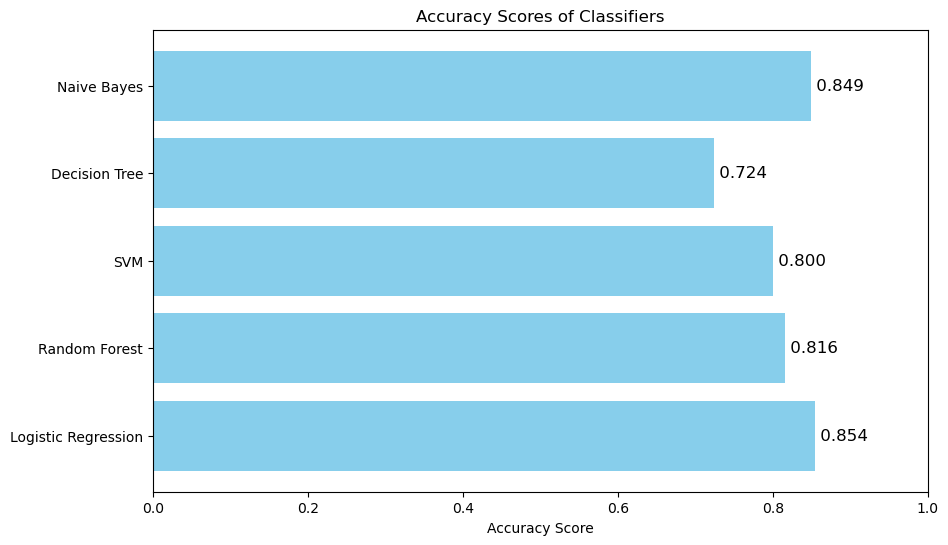

In [54]:
# Classifier names and accuracy scores
classifiers = ["Logistic Regression", "Random Forest", "SVM", "Decision Tree", "Naive Bayes"]
accuracy_scores = [0.854054, 0.816216, 0.800000, 0.724324, 0.848649]

# Create a horizontal bar chart for accuracy scores
plt.figure(figsize=(10, 6))
plt.barh(classifiers, accuracy_scores, color='skyblue')
plt.xlabel('Accuracy Score')
plt.title('Accuracy Scores of Classifiers')
plt.xlim(0, 1) 
# Show the accuracy scores on the bars
for i, score in enumerate(accuracy_scores):
    plt.text(score, i, f' {score:.3f}', va='center', fontsize=12)

plt.show()


The best performing model among the classifiers you evaluated is the "Logistic Regression" model with an accuracy score of approximately 0.854. 

In [55]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000, 1500]
}

# Create a logistic regression model
logreg = LogisticRegression()

# Create Grid Search Cross Validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_logreg = grid_search.best_estimator_

# Predict using the best model
logreg_pred_tuned = best_logreg.predict(X_test)

# Print the accuracy score after hyperparameter tuning
logreg_score_tuned = accuracy_score(y_test, logreg_pred_tuned)  
print("Tuned Logistic Regression Accuracy Score =", logreg_score_tuned)

# Print the classification report and confusion matrix after hyperparameter tuning
print("Classification Report after Hyperparameter Tuning:")
print(classification_report(y_test, logreg_pred_tuned))
print("Confusion Matrix after Hyperparameter Tuning:")
print(confusion_matrix(y_test, logreg_pred_tuned))


Best Hyperparameters: {'C': 1000, 'max_iter': 500, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy Score = 0.8540540540540541
Classification Report after Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.85      0.49      0.62        45
           1       0.86      0.97      0.91       140

    accuracy                           0.85       185
   macro avg       0.85      0.73      0.76       185
weighted avg       0.85      0.85      0.84       185

Confusion Matrix after Hyperparameter Tuning:
[[ 22  23]
 [  4 136]]


### Submission

In [56]:
test =pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [58]:
test = test.drop('Loan_ID', axis=1)


In [59]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].mean(),inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean(),inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mean(),inplace=True)

In [60]:
test['Dependents']=test['Dependents'].replace('3+',3)
test['Dependents']=test['Dependents'].astype(int)

In [61]:
# List of categorical columns in the test dataset
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
# Create dummy variables for the categorical columns in the test dataset
test_dummies = pd.get_dummies(test, columns=categorical_columns)

# Display the first few rows of the 'test_dummies' DataFrame
test_dummies.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5720,0,110.0,360.0,1.000000,0,1,0,1,1,0,1,0,0,0,1
1,1,3076,1500,126.0,360.0,1.000000,0,1,0,1,1,0,1,0,0,0,1
2,2,5000,1800,208.0,360.0,1.000000,0,1,0,1,1,0,1,0,0,0,1
3,2,2340,2546,100.0,360.0,0.825444,0,1,0,1,1,0,1,0,0,0,1
4,0,3276,0,78.0,360.0,1.000000,0,1,1,0,0,1,1,0,0,0,1


In [62]:
test_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               367 non-null    int32  
 1   ApplicantIncome          367 non-null    int64  
 2   CoapplicantIncome        367 non-null    int64  
 3   LoanAmount               367 non-null    float64
 4   Loan_Amount_Term         367 non-null    float64
 5   Credit_History           367 non-null    float64
 6   Gender_Female            367 non-null    uint8  
 7   Gender_Male              367 non-null    uint8  
 8   Married_No               367 non-null    uint8  
 9   Married_Yes              367 non-null    uint8  
 10  Education_Graduate       367 non-null    uint8  
 11  Education_Not Graduate   367 non-null    uint8  
 12  Self_Employed_No         367 non-null    uint8  
 13  Self_Employed_Yes        367 non-null    uint8  
 14  Property_Area_Rural      3

In [63]:
# Fit the best model to the training data
best_logreg.fit(X_train, y_train)
# Fit the best model to the training data
best_logreg.fit(X_train, y_train)
# Use the trained Logistic Regression model to predict the target variable for the test data
logreg_test_pred = best_logreg.predict(test_dummies)


In [64]:
# Create a submission DataFrame
submission = pd.DataFrame()
# Add the chosen identifier column
submission = test
# Add the predicted 'Loan_Status' column from the Logistic Regression model
submission['Loan_Status'] = logreg_test_pred
submission

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,1
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,1
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,1
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,1
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1.000000,Urban,1
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.000000,Urban,1
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.825444,Semiurban,1
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.000000,Rural,1


In [65]:
# Save the submission DataFrame to a CSV file
submission.to_csv('loan_prediction_submission.csv', index=False)


### Conclusion:

In conclusion, the logistic regression model performed the best among the classifiers evaluated, achieving an accuracy score of approximately 85.4%. The Naive Bayes model also showed competitive performance with an accuracy score of 84.9%.

###  Recommendations
Regular Model Evaluation and Updating:
Regularly evaluate the performance of your loan prediction models using relevant metrics such as accuracy, precision, recall, and F1-score.
Consider updating your models periodically to adapt to changing trends and patterns in the data.

Feature Importance Analysis:Conduct feature importance analysis to understand which variables have the most significant impact on loan predictions.
Use this analysis to refine your feature selection process and potentially improve model interpretability.

Utilize Ensemble Models:
Explore the use of ensemble models (e.g., Random Forests, Gradient Boosting) to combine predictions from multiple models. Ensemble methods often provide better performance than individual models.

Incorporate Explainable AI (XAI) Techniques:
Implement Explainable AI techniques to enhance the interpretability of your models. This is particularly important in the financial sector where transparency is crucial.

Fraud Detection Mechanisms:
Integrate fraud detection mechanisms into your loan prediction system. This could involve using anomaly detection algorithms to identify unusual patterns in the data that may indicate fraudulent activities.

Continuous Monitoring and Auditing:
Implement continuous monitoring and auditing processes to ensure that your models perform as expected over time.
Regularly review and update your models based on the latest data and business requirements.

Customer Segmentation:
Consider adopting customer segmentation techniques to tailor loan products and terms based on specific customer segments.
This can improve the precision of your predictions and enhance customer satisfaction.

Ethical AI Practices:
Adhere to ethical AI practices, especially when dealing with sensitive data such as financial information. Ensure that your models are fair, unbiased, and comply with regulatory standards.

Customer Education:
Educate customers about the factors influencing loan decisions and provide transparency on how models assess creditworthiness.
Clear communication can help build trust with customers.
Collaborate with Regulatory Bodies:

Stay informed about and comply with regulatory requirements related to loan predictions.
Collaborate with regulatory bodies to ensure that your practices align with industry standards.
Data Security Measures:
Implement robust data security measures to protect customer information and maintain the confidentiality of sensitive data.

Adaptive Learning Systems:
Explore the use of adaptive learning systems that can dynamically adjust to evolving market conditions and customer behaviors.